# Customer Churn Decision Tree Project

# 1. Upload and clean data

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Read data
churn = pd.read_excel("Customers.xlsx")
churn

,ID,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,RatePlan,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,CHURN
0,1,F,S,1,38000.00,N,229.64,24.393333,3,23.56,0.00,206.08,0,CC,Budget,Intnl_discount,Cancelled
1,6,M,M,2,29616.00,N,75.29,49.426667,2,29.78,0.00,45.50,0,CH,FreeLocal,Standard,Current
2,8,M,M,0,19732.80,N,47.25,50.673333,3,24.81,0.00,22.44,0,CC,FreeLocal,Standard,Current
3,11,M,S,2,96.33,N,59.01,56.473333,1,26.13,0.00,32.88,1,CC,Budget,Standard,Current
4,14,F,M,2,52004.80,N,28.14,25.140000,1,5.03,0.00,23.11,0,CH,Budget,Intnl_discount,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,3821,F,S,0,78851.30,N,29.04,48.373333,4,0.37,0.00,28.66,0,CC,FreeLocal,Standard,Cancelled
2066,3822,F,S,1,17540.70,Y,36.20,62.786667,1,22.17,0.57,13.45,0,Auto,Budget,Standard,Cancelled
2067,3823,F,M,0,83891.90,Y,74.40,61.020000,4,28.92,0.00,45.47,0,CH,Budget,Standard,Cancelled
2068,3824,F,M,2,28220.80,N,38.95,38.766667,4,26.49,0.00,12.46,0,CC,FreeLocal,Standard,Cancelled


In [3]:
churn.head()

,ID,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,RatePlan,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,CHURN
0,1,F,S,1,38000.00,N,229.64,24.393333,3,23.56,0.0,206.08,0,CC,Budget,Intnl_discount,Cancelled
1,6,M,M,2,29616.00,N,75.29,49.426667,2,29.78,0.0,45.50,0,CH,FreeLocal,Standard,Current
2,8,M,M,0,19732.80,N,47.25,50.673333,3,24.81,0.0,22.44,0,CC,FreeLocal,Standard,Current
3,11,M,S,2,96.33,N,59.01,56.473333,1,26.13,0.0,32.88,1,CC,Budget,Standard,Current
4,14,F,M,2,52004.80,N,28.14,25.140000,1,5.03,0.0,23.11,0,CH,Budget,Intnl_discount,Cancelled


In [5]:
churn.dtypes

ID                        int64
Sex                      object
Status                   object
Children                  int64
Est_Income              float64
Car_Owner                object
Usage                   float64
Age                     float64
RatePlan                  int64
LongDistance            float64
International           float64
Local                   float64
Dropped                   int64
Paymethod                object
LocalBilltype            object
LongDistanceBilltype     object
CHURN                    object
dtype: object

In [13]:
# Change categorical variables to "category"
churn['Sex'] = churn['Sex'].astype('category')
churn['Status'] = churn['Status'].astype('category')
churn['Car_Owner'] = churn['Car_Owner'].astype('category')
churn['Paymethod'] = churn['Paymethod'].astype('category')
churn['LocalBilltype'] = churn['LocalBilltype'].astype('category')
churn['LongDistanceBilltype'] = churn['LongDistanceBilltype'].astype('category')
churn['CHURN'] = churn['CHURN'].astype('category')

In [14]:
churn.dtypes

ID                         int64
Sex                     category
Status                  category
Children                   int64
Est_Income               float64
Car_Owner               category
Usage                    float64
Age                      float64
RatePlan                   int64
LongDistance             float64
International            float64
Local                    float64
Dropped                    int64
Paymethod               category
LocalBilltype           category
LongDistanceBilltype    category
CHURN                   category
dtype: object

# 2. Partition the data set for Decision Tree model

In [15]:
# Create dummy variables
churn = pd.get_dummies(churn, columns=['Sex','Status','Car_Owner','Paymethod','LocalBilltype','LongDistanceBilltype'],drop_first=True)
churn

,ID,Children,Est_Income,Usage,Age,RatePlan,LongDistance,International,Local,Dropped,CHURN,Sex_M,Status_M,Status_S,Car_Owner_Y,Paymethod_CC,Paymethod_CH,LocalBilltype_FreeLocal,LongDistanceBilltype_Standard
0,1,1,38000.00,229.64,24.393333,3,23.56,0.00,206.08,0,Cancelled,0,0,1,0,1,0,0,0
1,6,2,29616.00,75.29,49.426667,2,29.78,0.00,45.50,0,Current,1,1,0,0,0,1,1,1
2,8,0,19732.80,47.25,50.673333,3,24.81,0.00,22.44,0,Current,1,1,0,0,1,0,1,1
3,11,2,96.33,59.01,56.473333,1,26.13,0.00,32.88,1,Current,1,0,1,0,1,0,0,1
4,14,2,52004.80,28.14,25.140000,1,5.03,0.00,23.11,0,Cancelled,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,3821,0,78851.30,29.04,48.373333,4,0.37,0.00,28.66,0,Cancelled,0,0,1,0,1,0,1,1
2066,3822,1,17540.70,36.20,62.786667,1,22.17,0.57,13.45,0,Cancelled,0,0,1,1,0,0,0,1
2067,3823,0,83891.90,74.40,61.020000,4,28.92,0.00,45.47,0,Cancelled,0,1,0,1,0,1,0,1
2068,3824,2,28220.80,38.95,38.766667,4,26.49,0.00,12.46,0,Cancelled,0,1,0,0,1,0,1,1


In [16]:
# Partition the data
target = churn['CHURN']
predictors = churn.drop(['CHURN'], axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(1449, 18) (621, 18) (1449,) (621,)


In [17]:
# Examine the proportion of target variable for training data set
print(target_train.value_counts(normalize= True))

Current      0.611456
Cancelled    0.388544
Name: CHURN, dtype: float64


In [18]:
# Examine the proportion of target variable for testing data set
print(target_test.value_counts(normalize= True))

Current      0.611916
Cancelled    0.388084
Name: CHURN, dtype: float64


# 3. Decision Tree model prediction

In [19]:
# Build a decision tree model on training data with max_depth = 2
model = DecisionTreeClassifier(criterion = 'entropy', random_state= 1, max_depth=2)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

[Text(0.5, 0.8333333333333334, 'Children <= 1.5\nentropy = 0.964\nsamples = 1449\nvalue = [563, 886]\nclass = Yes'),
 Text(0.25, 0.5, 'International <= 0.14\nentropy = 0.998\nsamples = 808\nvalue = [427, 381]\nclass = No'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.995\nsamples = 590\nvalue = [270, 320]\nclass = Yes'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.855\nsamples = 218\nvalue = [157, 61]\nclass = No'),
 Text(0.75, 0.5, 'Status_S <= 0.5\nentropy = 0.746\nsamples = 641\nvalue = [136, 505]\nclass = Yes'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.488\nsamples = 462\nvalue = [49, 413]\nclass = Yes'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.999\nsamples = 179\nvalue = [87, 92]\nclass = Yes')]

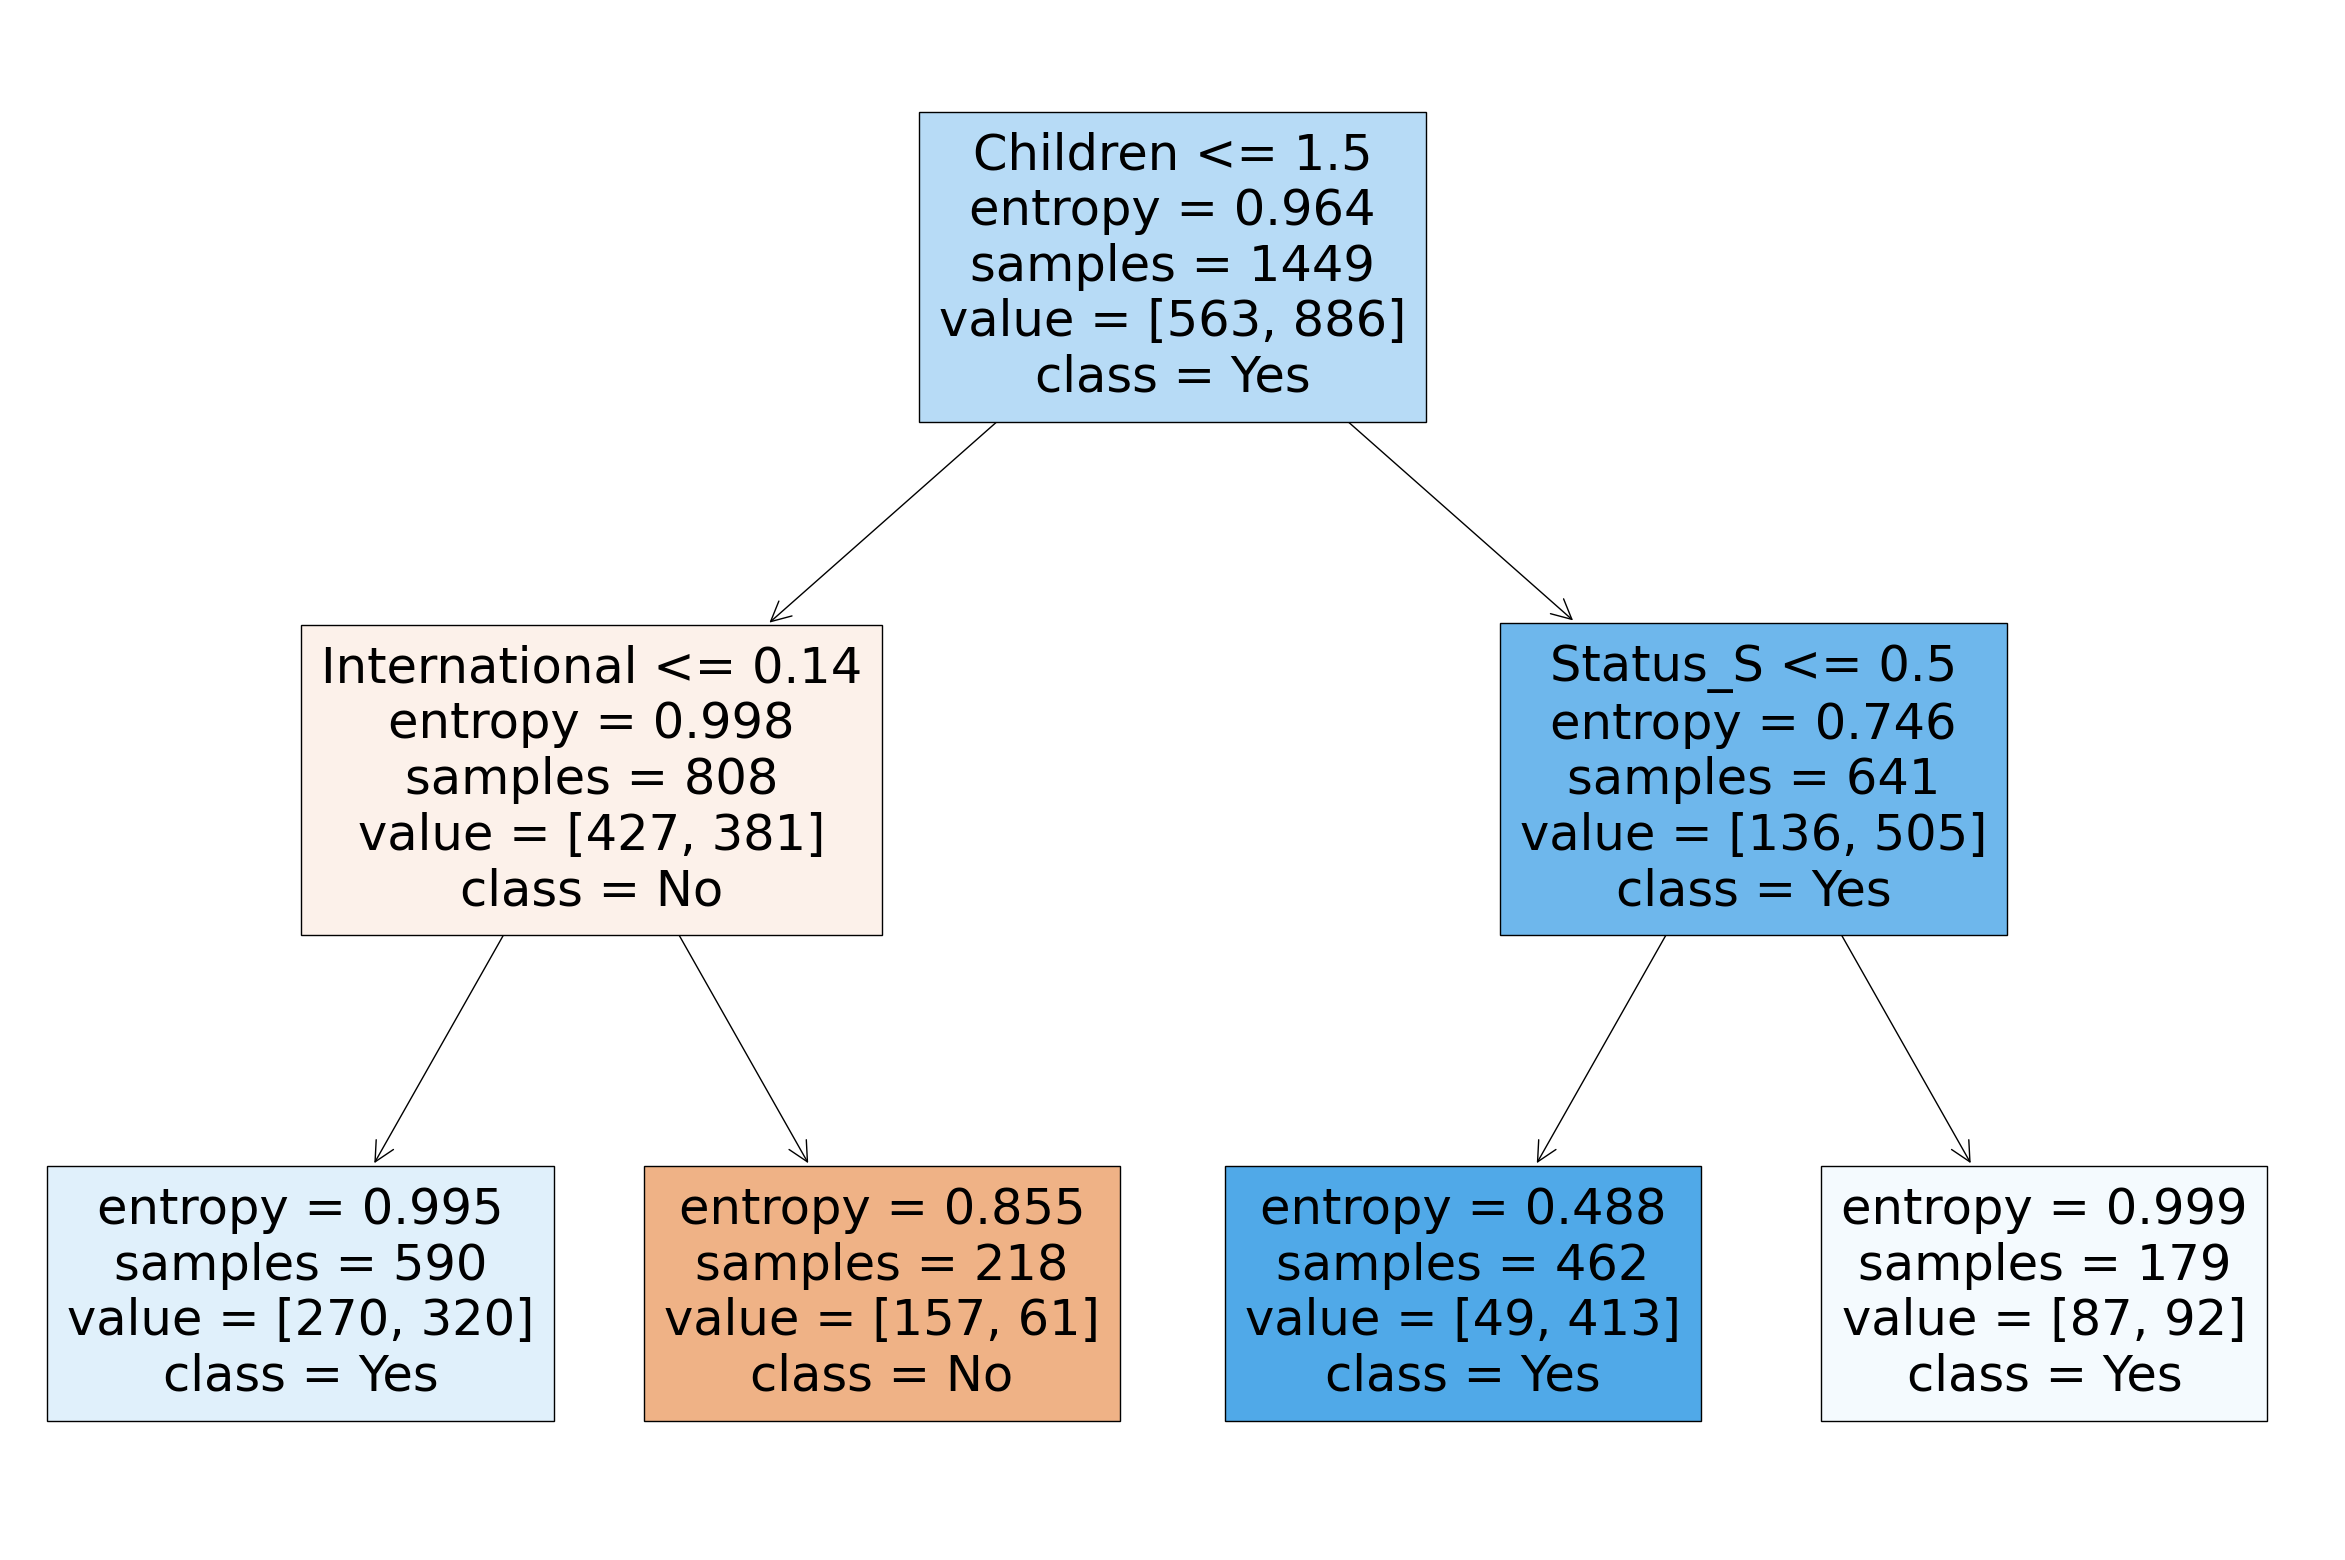

In [20]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model, feature_names=list(predictors_train.columns), class_names=['No','Yes'], filled=True)

In [21]:
# Make predictions on training and testing data
prediction_on_train = model.predict(predictors_train)
prediction_on_test = model.predict(predictors_test)

/Users/ninhnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


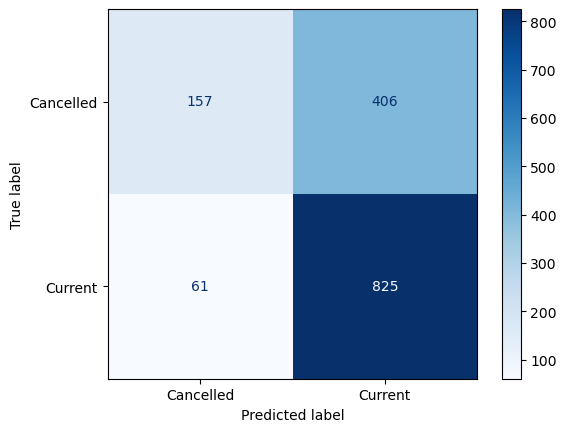

In [22]:
# Examine the evaluation results on training data: confusion_matrix
plot_confusion_matrix(model, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

/Users/ninhnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


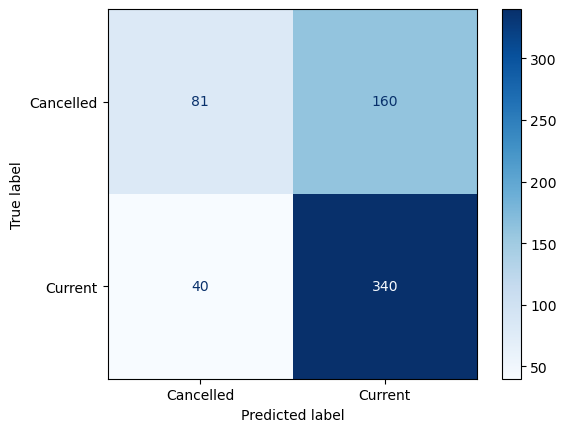

In [23]:
# Examine the evaluation results on testing data: confusion_matrix
plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [24]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

   Cancelled       0.72      0.28      0.40       563
     Current       0.67      0.93      0.78       886

    accuracy                           0.68      1449
   macro avg       0.70      0.61      0.59      1449
weighted avg       0.69      0.68      0.63      1449



In [25]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

   Cancelled       0.67      0.34      0.45       241
     Current       0.68      0.89      0.77       380

    accuracy                           0.68       621
   macro avg       0.67      0.62      0.61       621
weighted avg       0.68      0.68      0.65       621



In [26]:
# Build a decision tree model on training data with max_depth = 10
model2 = DecisionTreeClassifier(criterion = 'entropy', random_state= 1, max_depth=10)
model2.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)

[Text(0.5776627218934911, 0.9545454545454546, 'Children <= 1.5\nentropy = 0.964\nsamples = 1449\nvalue = [563, 886]\nclass = Yes'),
 Text(0.36076183431952663, 0.8636363636363636, 'International <= 0.14\nentropy = 0.998\nsamples = 808\nvalue = [427, 381]\nclass = No'),
 Text(0.20377218934911243, 0.7727272727272727, 'Est_Income <= 42380.25\nentropy = 0.995\nsamples = 590\nvalue = [270, 320]\nclass = Yes'),
 Text(0.07507396449704141, 0.6818181818181818, 'Status_S <= 0.5\nentropy = 0.957\nsamples = 251\nvalue = [156, 95]\nclass = No'),
 Text(0.04142011834319527, 0.5909090909090909, 'Age <= 28.423\nentropy = 0.93\nsamples = 107\nvalue = [37, 70]\nclass = Yes'),
 Text(0.023668639053254437, 0.5, 'Usage <= 27.17\nentropy = 0.74\nsamples = 43\nvalue = [34, 9]\nclass = No'),
 Text(0.01775147928994083, 0.4090909090909091, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes'),
 Text(0.029585798816568046, 0.4090909090909091, 'Car_Owner_Y <= 0.5\nentropy = 0.552\nsamples = 39\nvalue = [34, 5]\n

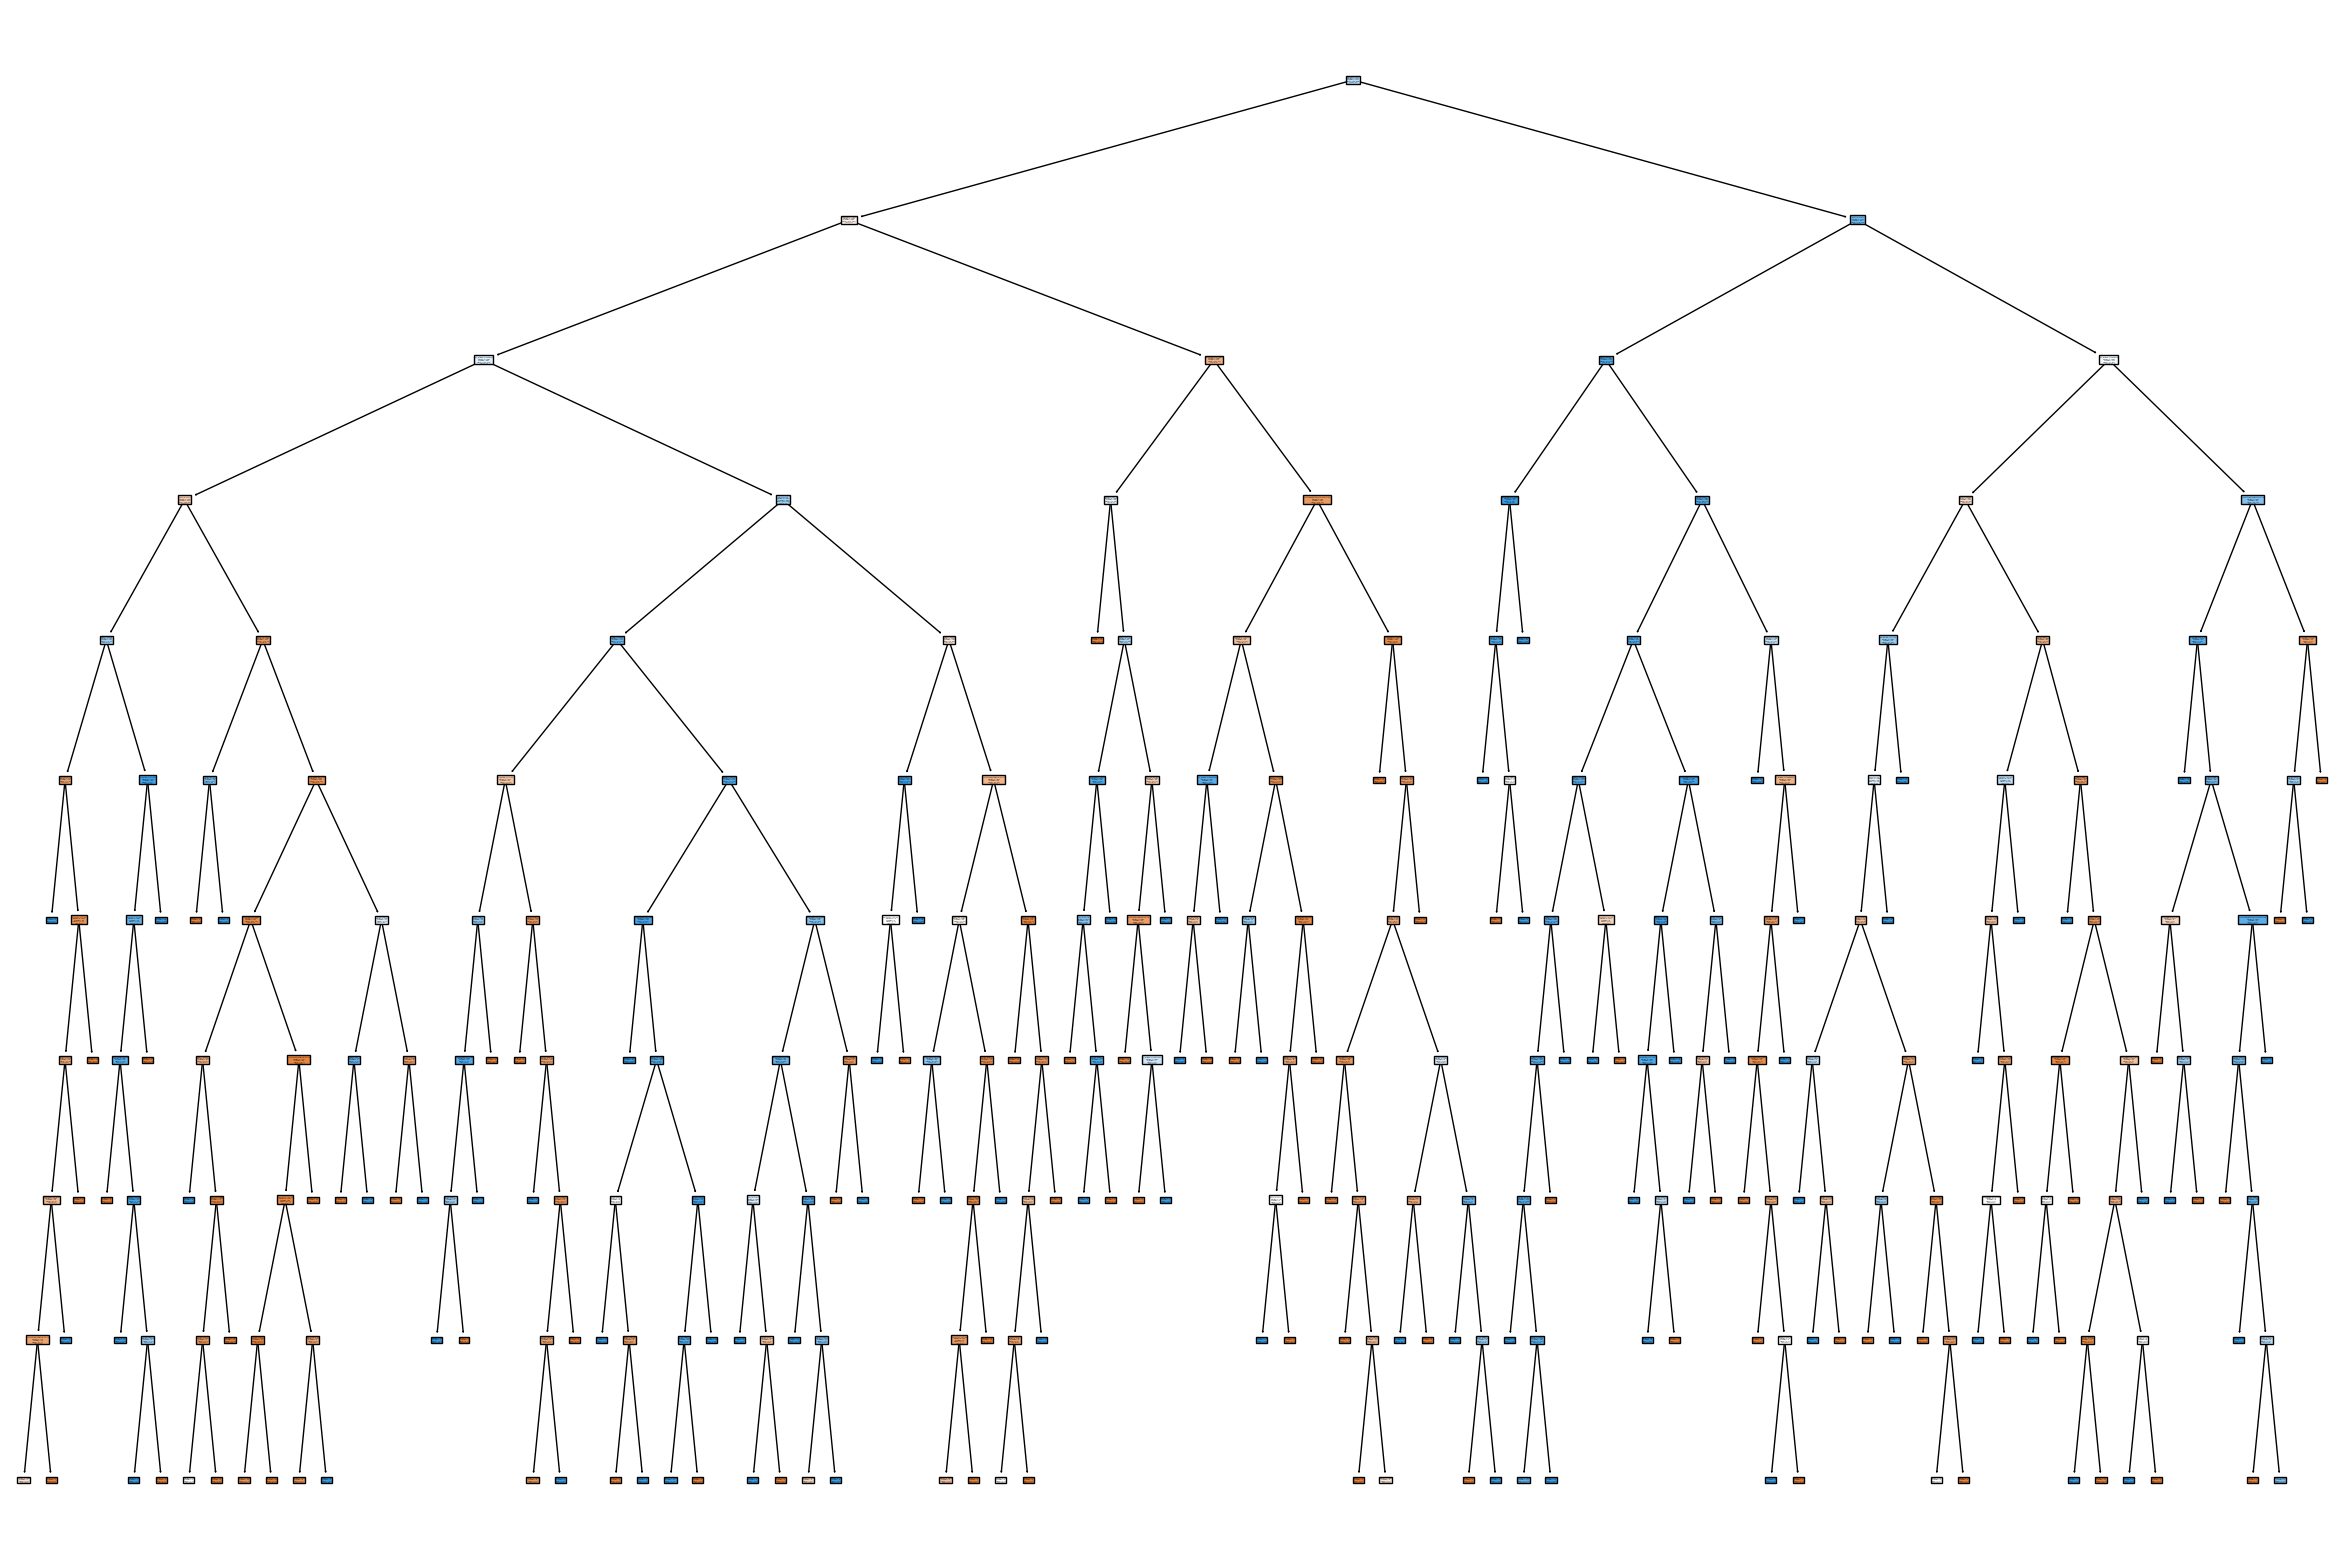

In [27]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model2, feature_names=list(predictors_train.columns), class_names=['No','Yes'], filled=True)

In [28]:
# Make predictions on training and testing data
prediction_on_train = model2.predict(predictors_train)
prediction_on_test = model2.predict(predictors_test)

/Users/ninhnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


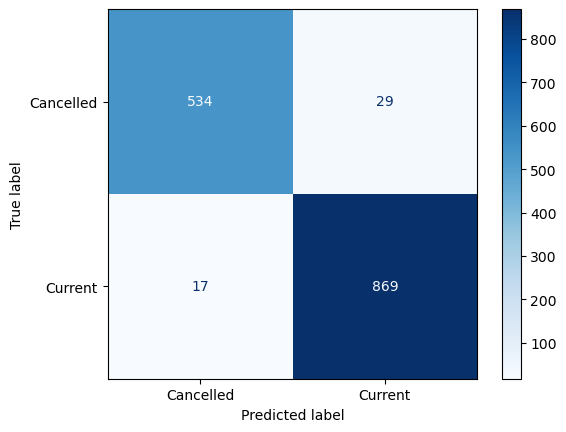

In [29]:
# Examine the evaluation results on training data: confusion_matrix
plot_confusion_matrix(model2, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

/Users/ninhnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


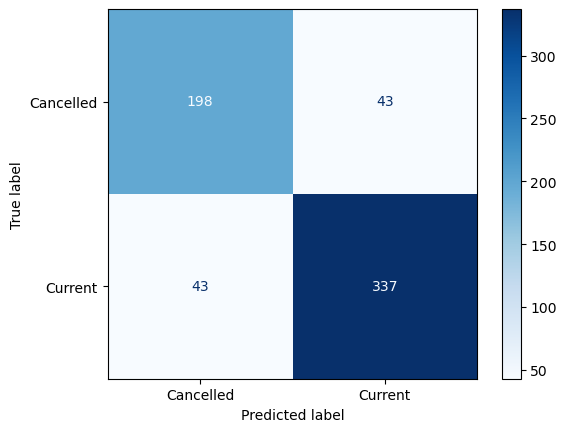

In [30]:
# Examine the evaluation results on testing data: confusion_matrix
plot_confusion_matrix(model2, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [31]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

   Cancelled       0.97      0.95      0.96       563
     Current       0.97      0.98      0.97       886

    accuracy                           0.97      1449
   macro avg       0.97      0.96      0.97      1449
weighted avg       0.97      0.97      0.97      1449



In [32]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

   Cancelled       0.82      0.82      0.82       241
     Current       0.89      0.89      0.89       380

    accuracy                           0.86       621
   macro avg       0.85      0.85      0.85       621
weighted avg       0.86      0.86      0.86       621



## Summary
<br>
The accuracy of the 2nd model exceeds the first model in predicting the correct number of customers who have cancelled or kept the product offered.